# Image Analysis

**To Dos**
* Create a text file with collected image metadata.

In [1]:
import sys
sys.path.append('./_backend/')

import nrrd
import utils
import ioutil

import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_ct_imagedir = './../../../data_source/raw_images/ct_cropped/' 
path_masksdir = './../../../data_source/raw_images/masks_cropped/'
path_pet_imagedir = './../../../data_source/raw_images/pet_cropped/'

In [3]:
PATIENT_ID = np.load('./../../../data_source/patient_id.npy')

In [4]:
paths_ct_images = ioutil.sample_paths(
    path_ct_imagedir, path_masksdir, target_format='nrrd'
)
paths_pet_images = ioutil.sample_paths(
    path_pet_imagedir, path_masksdir, target_format='nrrd'
)

In [5]:
len(paths_ct_images), len(paths_pet_images)

(198, 198)

In [9]:
# Image shapes.
ct_shapes, pet_shapes = [], []
for ct_path, pet_path in zip(paths_ct_images, paths_pet_images):
    _, ct_header = nrrd.read(ct_path['Image'])
    _, pet_header = nrrd.read(pet_path['Image'])
    ct_shapes.append(ct_header['sizes'])
    pet_shapes.append(pet_header['sizes'])

In [14]:
ct_shapes[:4]

[array([82, 83, 68]),
 array([69, 64, 74]),
 array([73, 70, 82]),
 array([ 81, 106, 114])]

In [15]:
pet_shapes[:4]

[array([82, 83, 68]),
 array([69, 64, 74]),
 array([73, 70, 82]),
 array([ 81, 106, 114])]

In [16]:
# CT images coreg with PET (???). Thus, CT and PET stacks per
# patient are equally shaped.
np.array_equal(ct_shapes, pet_shapes)

True

## CT 

In [5]:
ct_data, ct_mdata = {}, {}
for ct_path in paths_ct_images:
    data, header = nrrd.read(ct_path['Image'])
    ct_mdata[ct_path['Patient']] = header
    ct_data[ct_path['Patient']] = data

In [ ]:
# Look for tumor location + Gaussian kernel
# * Group patients according to where tumor located?

In [19]:
tumor_dims = [str(items['sizes']) for items in ct_mdata.values()]
tumor_sizes = [np.product(items['sizes']) for items in ct_mdata.values()]

In [25]:
tumor_sizes.index(min(tumor_sizes)), tumor_sizes.index(max(tumor_sizes))

(20, 88)

In [26]:
tumor_dims[20], tumor_dims[88]

('[48 52 56]', '[146 135 140]')

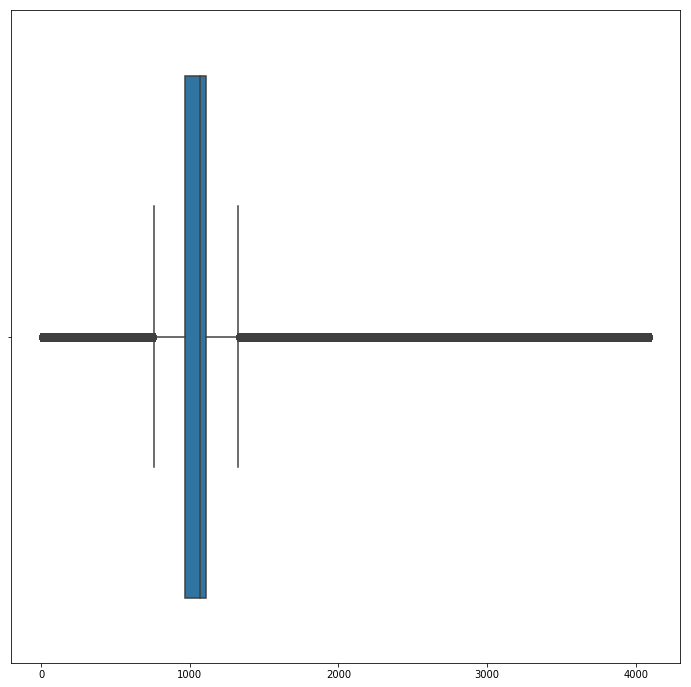

In [12]:
# Boxplots of image intensity values.
# * May be too crowded due to multiple patients.

plt.figure(figsize=(12, 12))
# https://python-graph-gallery.com/38-show-number-of-observation-on-boxplot/
sns.boxplot(x=df_ct.columns, data=df_ct)

## PET 

In [8]:
#pet_data = {}
#for pet_path in paths_pet_images:
#    data, _ = nrrd.read(pet_path['Image'])
#    pet_data[pet_path['Patient']] = data